## Throw with air resistance

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Function to calculate the aero drag

In [2]:
def air_drag(aero_coefficient, front_surface, air_density, velocity):
    drag = (0.5 * aero_coefficient * front_surface * air_density * velocity**2) * (-np.sign(velocity))
    return(drag)

In [3]:
g = -9.81
timestep = 0.001

#### Initial conditions

In [4]:
x_0 = 0
y_0 = 0.005
mass = 1
aero_coeff = 0.8
air_density = 1.2
front_surface = 0.01
angle_0_deg = 30
v_0 = 60

#### Initial velocity components

In [5]:
angle_0 = np.radians(angle_0_deg)
v_0_x = v_0 * np.cos(angle_0)
v_0_y = v_0 * np.sin(angle_0)

#### Simulation

In [6]:
x = x_0
y = y_0
x_log = [x_0]
y_log = [y_0]
time_log = [0]
v_x = v_0_x
v_y = v_0_y
while (y > 0):
    x = x + v_x * timestep
    y = y + v_y * timestep
    drag = air_drag(aero_coeff, front_surface, air_density, v_x)
    acceleration_x = drag / mass
    v_x = v_x + acceleration_x * timestep
    v_y = v_y + g * timestep
    time_log.append(time_log[-1] + timestep)
    x_log.append(x)
    y_log.append(y)

#### Plots

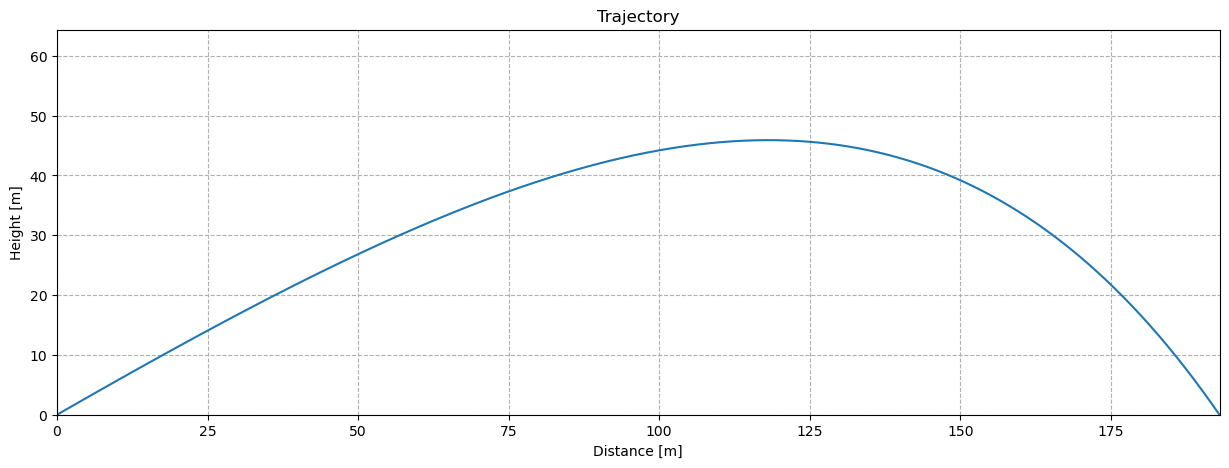

In [7]:
y_axis = max(y_log)
x_axis = max(x_log)
if y_axis * 3 > x_axis:
    y_lim = y_axis
    x_lim = y_lim * 3
else:
    x_lim = x_axis
    y_lim = x_lim / 3
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,5))
ax.set_title('Trajectory')
ax.set_xlabel('Distance [m]')
ax.set_ylabel('Height [m]')
ax.grid(linestyle='--')
ax.plot(x_log,y_log)
ax.axis((0, x_lim, 0, y_lim))
plt.show()